Francisco Leonid Galvez Flores
A01174385

[Link al colab](https://colab.research.google.com/drive/1QaVWa7dkGIAYah6GVSnbTzR9WcezU47X?usp=sharing)


# **Importacion de librerias:**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st

# **Importacion de la base de datos y modificaciones basicas:**

In [ ]:
url = "https://raw.githubusercontent.com/G4LF0/ModuloEstadisticaInteligenciaArtificial/main/ds_salaries.csv"

In [ ]:
df = pd.read_csv(url)
df.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [ ]:
df = df.drop(["Unnamed: 0"], axis = 1)

In [ ]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df.shape

(607, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

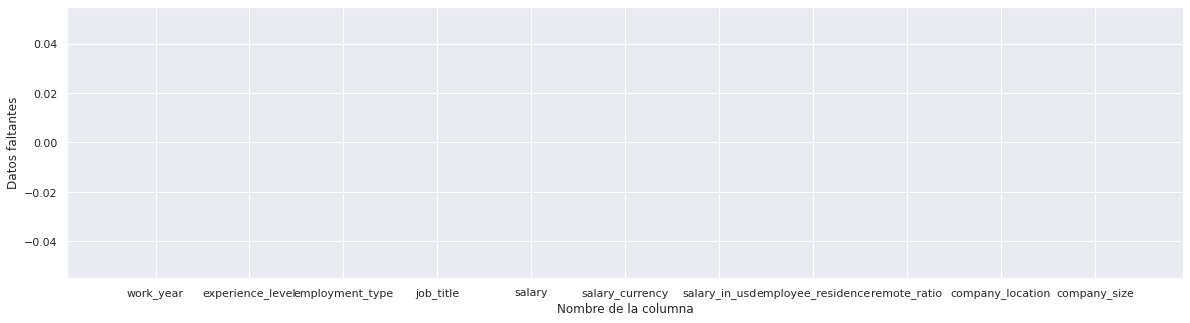

In [ ]:
bardata = df.isnull().sum()
plt.figure(figsize=(20,5))
plt.bar(df.columns, bardata, color = "blue")
plt.xlabel('Nombre de la columna')
plt.ylabel('Datos faltantes')
plt.show()

# **¿Cuál es el salario al que pueda aspirar un analista de datos?**

In [ ]:
Data_Analyst = df.groupby(["job_title"]).get_group("Data Analyst")

In [ ]:
Data_Analyst = Data_Analyst[["job_title", "salary_in_usd"]]

In [ ]:
Data_Analyst.describe()

,salary_in_usd
count,97.000000
mean,92893.061856
std,39961.075848
min,6072.000000
25%,62000.000000
50%,90320.000000
75%,116150.000000
max,200000.000000


Como podemos oberservar un analista de datos aspira a una media salarial de 92893.061856, a un maximo de 200,000 y a un minimo de 6072(todas las unidades estan expresadas en dolares).

# **¿En qué países se ofrecen mejores salarios?**

In [ ]:
df.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L


In [ ]:
paises_sueldo = df[["company_location","salary_in_usd"]]
paises_sueldo.sort_values(by=['salary_in_usd'], ascending = False)

,company_location,salary_in_usd
252,US,600000
97,US,450000
33,US,450000
157,US,423000
225,US,416000
...,...,...
179,US,5679
77,IN,5409
238,VN,4000
185,IR,4000


In [ ]:
paises_sueldo.describe()

,salary_in_usd
count,607.000000
mean,112297.869852
std,70957.259411
min,2859.000000
25%,62726.000000
50%,101570.000000
75%,150000.000000
max,600000.000000


Los paises que tiene mejores salarios se encontraran por arriba del 75%:

In [ ]:
mejores_paises_sueldo = paises_sueldo.loc[(paises_sueldo.salary_in_usd >= 150000) & (paises_sueldo.salary_in_usd < 600000)]
mejores_paises_sueldo

,company_location,salary_in_usd
1,JP,260000
4,US,150000
6,US,190000
25,US,325000
33,US,450000
...,...,...
597,US,170000
598,US,160000
602,US,154000
605,US,150000


Como podemos ver estos son los paises que tienen los salarios mas elevados(en dolares):

In [ ]:
mejores_paises_sueldo.groupby("company_location").count()

,salary_in_usd
company_location,
AU,1
CA,4
DE,2
FR,1
GB,1
JP,2
PL,1
RU,1
US,145


# **¿Se han incrementado los salarios a lo largo del tiempo?**

In [ ]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


Procedere a hacer datasets, para separar las empresas por su tamaño.

In [ ]:
chicas = df.groupby("company_size").get_group("S")
medianas = df.groupby("company_size").get_group("M")
grandes = df.groupby("company_size").get_group("L")

In [ ]:
chicas = chicas[["salary_in_usd", "work_year"]]
chicas.describe()

,salary_in_usd,work_year
count,83.000000,83.000000
mean,77632.674699,2020.855422
std,63461.706497,0.665024
min,2859.000000,2020.000000
25%,41943.000000,2020.000000
50%,65000.000000,2021.000000
75%,100000.000000,2021.000000
max,416000.000000,2022.000000


In [ ]:
chicas = chicas.sort_values('work_year', ascending = True)

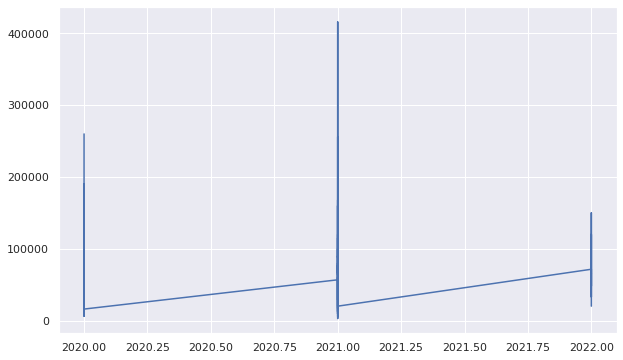

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(chicas.work_year, chicas.salary_in_usd)

<BarContainer object of 83 artists>

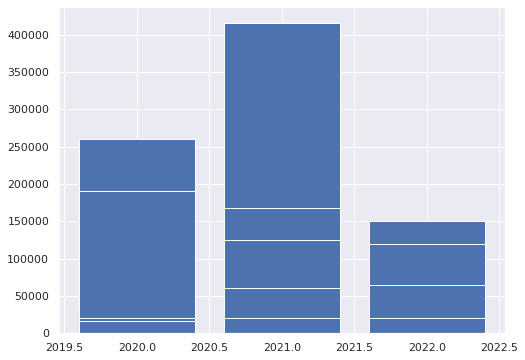

In [ ]:
plt.bar(chicas.work_year, chicas.salary_in_usd)

In [ ]:
medianas = medianas[["salary_in_usd", "work_year"]]
medianas.describe()

,salary_in_usd,work_year
count,326.000000,326.000000
mean,116905.466258,2021.751534
std,59287.694614,0.522933
min,4000.000000,2020.000000
25%,78131.500000,2022.000000
50%,113188.000000,2022.000000
75%,152875.000000,2022.000000
max,450000.000000,2022.000000


In [ ]:
medianas = medianas.sort_values('work_year', ascending = True)

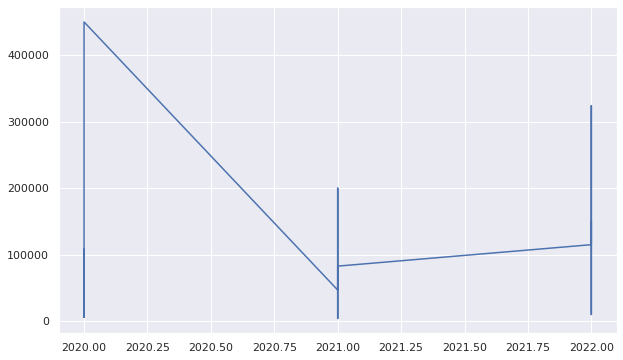

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(medianas.work_year, medianas.salary_in_usd)

<BarContainer object of 326 artists>

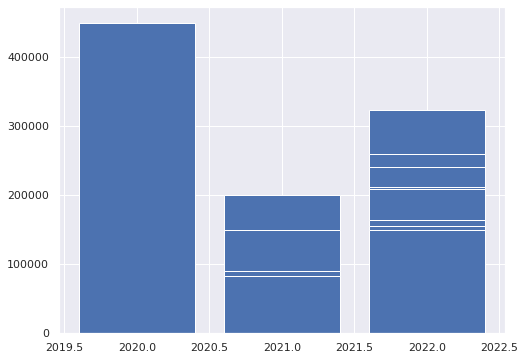

In [ ]:
plt.bar(medianas.work_year, medianas.salary_in_usd)

In [ ]:
grandes = grandes[["salary_in_usd", "work_year"]]
grandes.describe()

,salary_in_usd,work_year
count,198.000000,198.000000
mean,119242.994949,2021.065657
std,86156.740692,0.629827
min,5882.000000,2020.000000
25%,61041.750000,2021.000000
50%,100000.000000,2021.000000
75%,154600.000000,2021.000000
max,600000.000000,2022.000000


In [ ]:
grandes = grandes.sort_values('work_year', ascending = True)

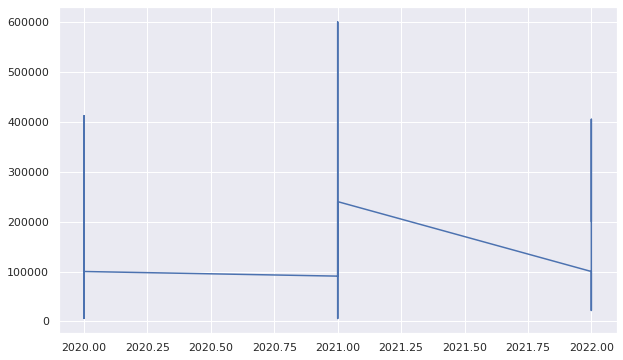

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(grandes.work_year, grandes.salary_in_usd)

<BarContainer object of 198 artists>

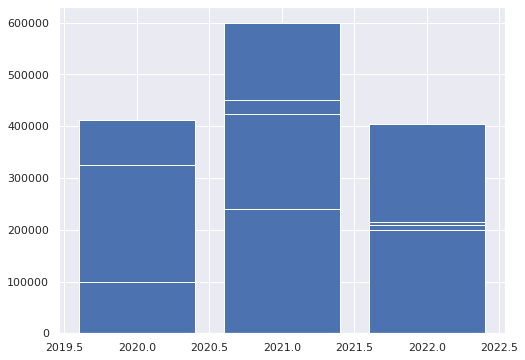

In [ ]:
plt.bar(grandes.work_year, grandes.salary_in_usd)

Como podemos ver del 2020 al 2021 si existio un aumento, puede que no se visualice por completo el 2022 porque aun no a acabado.

# **¿Influye el nivel de experiencia en el salario?**

In [ ]:
df.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L


In [ ]:
df.groupby("experience_level").count()

,work_year,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
experience_level,,,,,,,,,,
EN,88,88,88,88,88,88,88,88,88,88
EX,26,26,26,26,26,26,26,26,26,26
MI,213,213,213,213,213,213,213,213,213,213
SE,280,280,280,280,280,280,280,280,280,280


<BarContainer object of 607 artists>

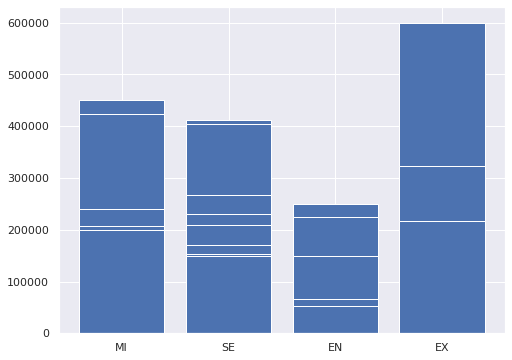

In [ ]:
plt.bar(df.experience_level, df.salary_in_usd)

# **¿Influye el tamaño de la compañía en el salario que puede ofrecer a un analista de datos?**

In [ ]:
analista = df.groupby("job_title").get_group("Data Analyst")

In [ ]:
analista_chicas = df.groupby("company_size").get_group("S")
analista_chicas = analista_chicas[["company_size", "salary_in_usd"]]
analista_chicas.describe()

,salary_in_usd
count,83.000000
mean,77632.674699
std,63461.706497
min,2859.000000
25%,41943.000000
50%,65000.000000
75%,100000.000000
max,416000.000000


In [ ]:
analista_medianas = df.groupby("company_size").get_group("M")
analista_medianas = analista_medianas[["company_size", "salary_in_usd"]]
analista_medianas.describe()

,salary_in_usd
count,326.000000
mean,116905.466258
std,59287.694614
min,4000.000000
25%,78131.500000
50%,113188.000000
75%,152875.000000
max,450000.000000


In [ ]:
analista_grandes = df.groupby("company_size").get_group("L")
analista_grandes = analista_grandes[["company_size", "salary_in_usd"]]
analista_grandes.describe()

,salary_in_usd
count,198.000000
mean,119242.994949
std,86156.740692
min,5882.000000
25%,61041.750000
50%,100000.000000
75%,154600.000000
max,600000.000000


Podemos ver que el tamaño de la compañia si influye en el salario.

# **¿Qué tipo de contrato (parcial, tiempo completo, etc) ofrece mejores salarios? ¿Qué tipo de contrato será el más conveniente?**

In [ ]:
df.groupby("employment_type").count()

,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
employment_type,,,,,,,,,,
CT,5,5,5,5,5,5,5,5,5,5
FL,4,4,4,4,4,4,4,4,4,4
FT,588,588,588,588,588,588,588,588,588,588
PT,10,10,10,10,10,10,10,10,10,10


In [ ]:
freelance = df.groupby("employment_type").get_group("FL")
freelance = freelance[["salary_in_usd"]]
freelance.describe()

,salary_in_usd
count,4.00000
mean,48000.00000
std,40529.82441
min,12000.00000
25%,18000.00000
50%,40000.00000
75%,70000.00000
max,100000.00000


In [ ]:
contratos = df.groupby("employment_type").get_group("CT")
contratos = contratos[["salary_in_usd"]]
contratos.describe()

,salary_in_usd
count,5.000000
mean,184575.000000
std,156250.889997
min,31875.000000
25%,100000.000000
50%,105000.000000
75%,270000.000000
max,416000.000000


In [ ]:
parte = df.groupby("employment_type").get_group("PT")
parte = parte[["salary_in_usd"]]
parte.describe()

,salary_in_usd
count,10.000000
mean,33070.500000
std,31472.907966
min,5409.000000
25%,12000.000000
50%,18817.500000
75%,48370.000000
max,100000.000000


In [ ]:
completo = df.groupby("employment_type").get_group("FT")
completo = parte[["salary_in_usd"]]
completo.describe()

,salary_in_usd
count,10.000000
mean,33070.500000
std,31472.907966
min,5409.000000
25%,12000.000000
50%,18817.500000
75%,48370.000000
max,100000.000000


Segun los datos el que mas conviene es el de tiempo parcial, ya que comparten la media de ingreso de salario.

# **Analisis necesario para la evidencia:**

In [ ]:
df.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L


In [ ]:
df = df.drop(columns = ["salary", "salary_currency"], axis = 1)

In [ ]:
df = df.rename(columns = {"salary_in_usd":"salary"})

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


# **Work year**

In [ ]:
year = df.work_year
year.describe().round(0)

count     607.0
mean     2021.0
std         1.0
min      2020.0
25%      2021.0
50%      2022.0
75%      2022.0
max      2022.0
Name: work_year, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


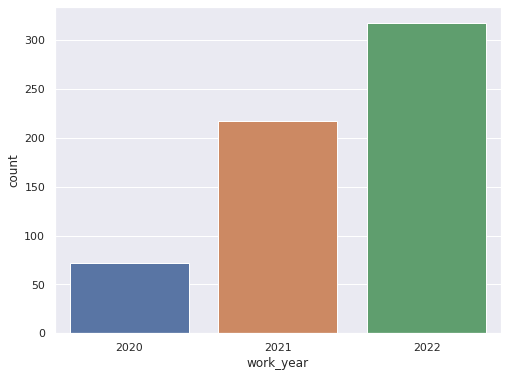

In [ ]:
sns.countplot(year)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


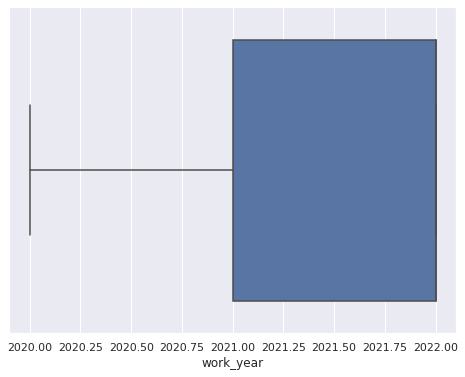

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(year)

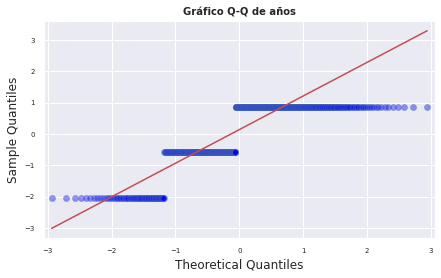

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    year,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de años', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

# **Experience level:**

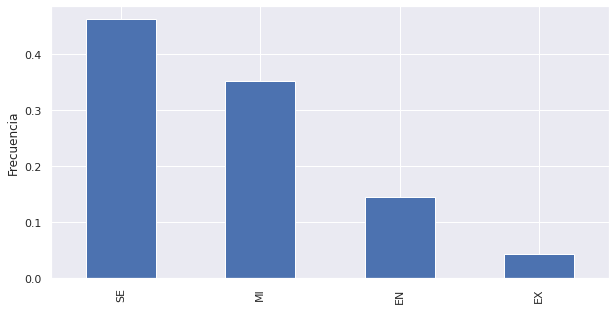

In [ ]:
experience = df.experience_level
plt.figure(figsize = (10,5))
ax =  experience.value_counts('experience_level').plot(kind ='bar')
ax.set_ylabel('Frecuencia')
plt.show()



*   EN → Junior (0)
*   MI → Intermediete (1)
*   SE → Senior (2)
*   EX → Director (3)


In [ ]:
df.groupby(["experience_level"]).count()
df.experience_level = df.experience_level.map({"EN":0, "MI":1, "SE":2, "EX":3})

In [ ]:
experience = df.experience_level
experience.describe().round(0)

count    607.0
mean       1.0
std        1.0
min        0.0
25%        1.0
50%        2.0
75%        2.0
max        3.0
Name: experience_level, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


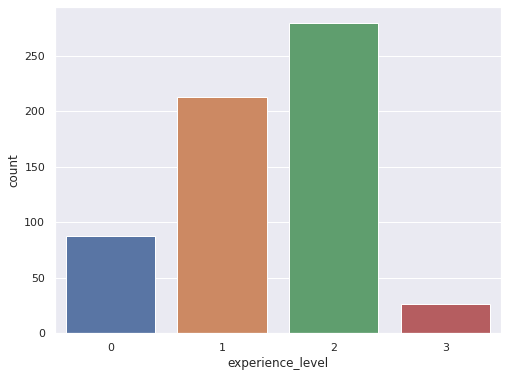

In [ ]:
sns.countplot(experience)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


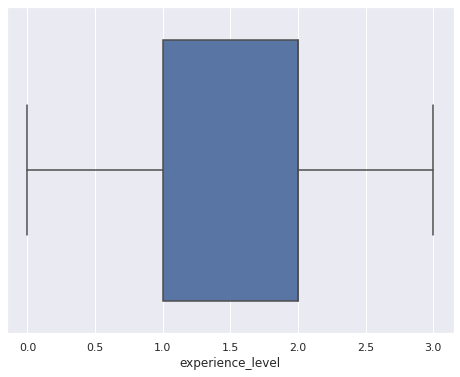

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(experience)

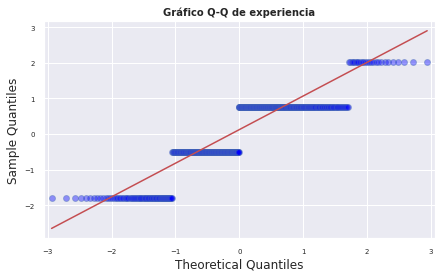

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    experience,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de experiencia', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

# **Salary**

In [ ]:
salary = df.salary
salary.describe().round(5)

count       607.00000
mean     112297.86985
std       70957.25941
min        2859.00000
25%       62726.00000
50%      101570.00000
75%      150000.00000
max      600000.00000
Name: salary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


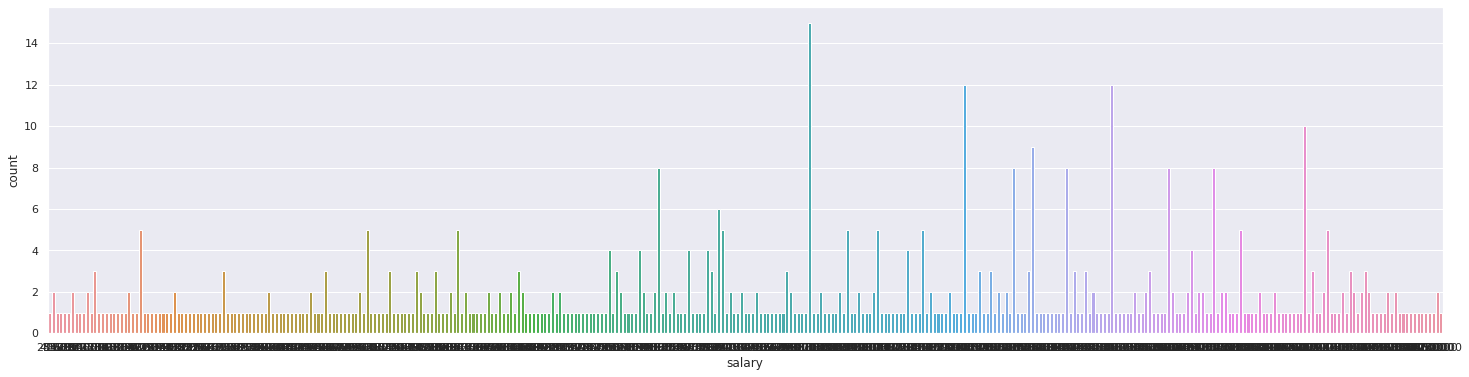

In [ ]:
sns.set(rc={'figure.figsize':(25,6)})
sns.countplot(salary)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


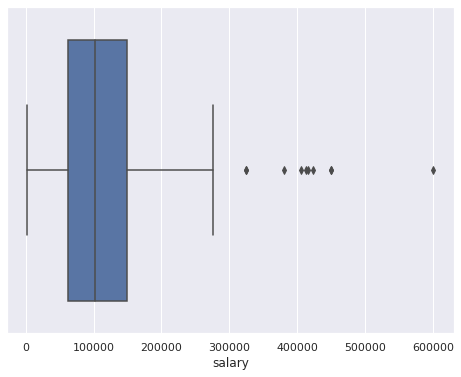

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(salary)

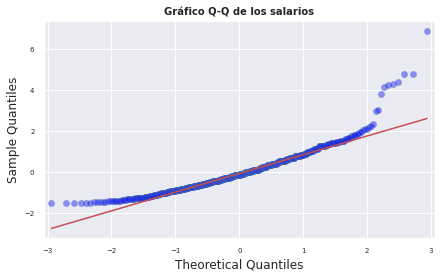

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    salary,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de los salarios', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

# **Employmente type**

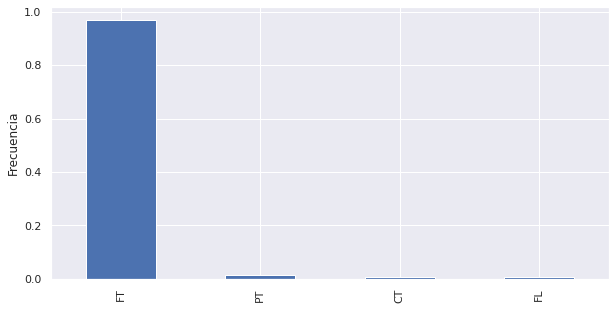

In [ ]:
tp_empleo = df.employment_type
plt.figure(figsize = (10,5))
ax =  tp_empleo.value_counts('employment_type').plot(kind ='bar')
ax.set_ylabel('Frecuencia')
plt.show()

In [ ]:
df.groupby(["employment_type"]).count()
df.employment_type = df.employment_type.map({"FL":0, "CT":1, "PT":2, "FT":3})

In [ ]:
tp_empleo = df.employment_type
tp_empleo.describe().round(5)

count    607.00000
mean       2.94728
std        0.32577
min        0.00000
25%        3.00000
50%        3.00000
75%        3.00000
max        3.00000
Name: employment_type, dtype: float64

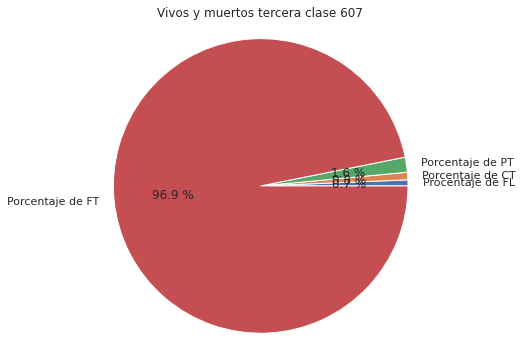

In [ ]:
cantidad_0 = len(df.groupby("employment_type").get_group(0))
cantidad_1 = len(df.groupby("employment_type").get_group(1))
cantidad_2 = len(df.groupby("employment_type").get_group(2))
cantidad_3 = len(df.groupby("employment_type").get_group(3))
pastel = [cantidad_0, cantidad_1, cantidad_2, cantidad_3]
titulos = ["Procentaje de FL", "Porcentaje de CT", "Porcentaje de PT", "Porcentaje de FT"]
plt.title("Vivos y muertos tercera clase" + " " + str(len(df)))
plt.pie(pastel, labels=titulos, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


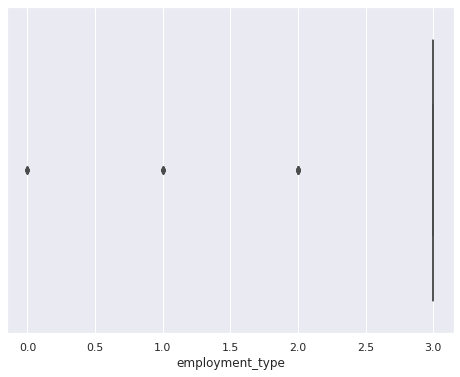

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(tp_empleo)

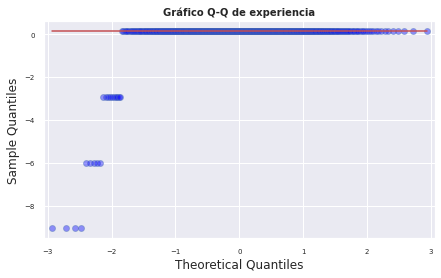

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    tp_empleo,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de tipo de empleo', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

# **Remote ratio**

In [ ]:
r_ratio = df.remote_ratio
r_ratio.describe().round(5)

count    607.00000
mean      70.92257
std       40.70913
min        0.00000
25%       50.00000
50%      100.00000
75%      100.00000
max      100.00000
Name: remote_ratio, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


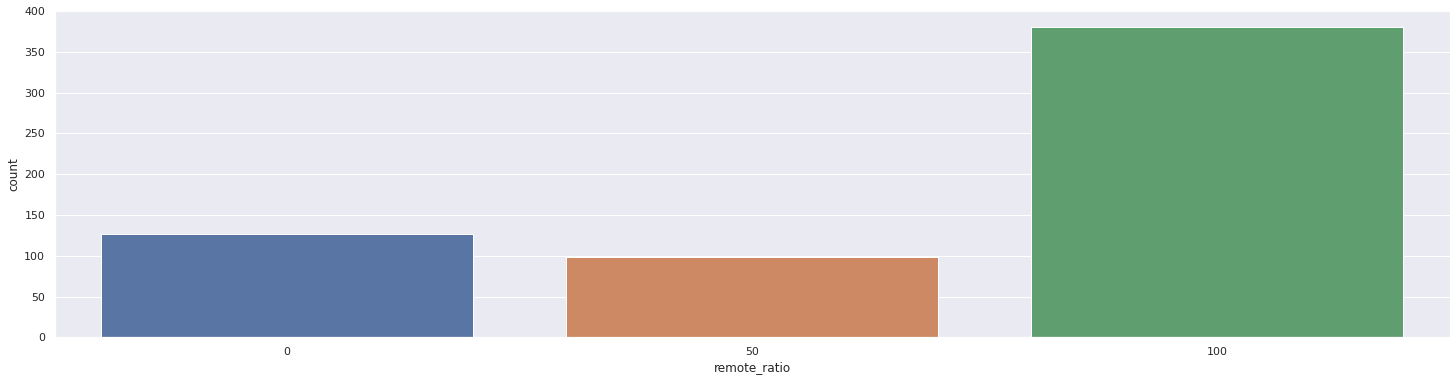

In [ ]:
sns.set(rc={'figure.figsize':(25,6)})
sns.countplot(r_ratio)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


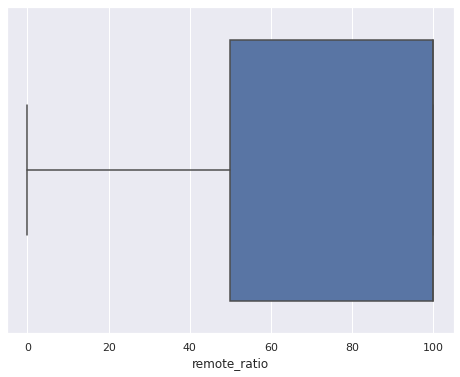

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(r_ratio)

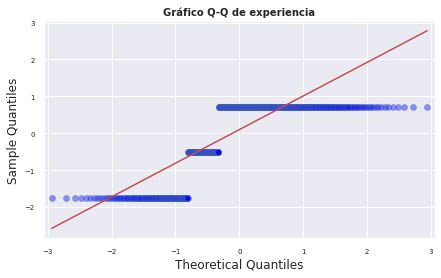

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    r_ratio,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de remote ratio', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

# **Company size**

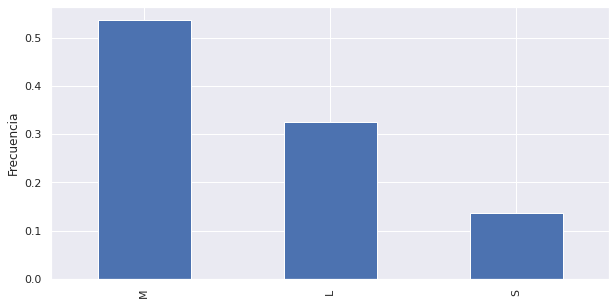

In [ ]:
c_size = df.company_size
plt.figure(figsize = (10,5))
ax =  c_size.value_counts('company_size').plot(kind ='bar')
ax.set_ylabel('Frecuencia')
plt.show()

In [ ]:
df.groupby(["company_size"]).count()
df.company_size = df.company_size.map({"S":0, "M":1, "L":2})

In [ ]:
c_size = df.company_size
c_size.describe().round(5)

count    607.00000
mean       1.18946
std        0.65402
min        0.00000
25%        1.00000
50%        1.00000
75%        2.00000
max        2.00000
Name: company_size, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


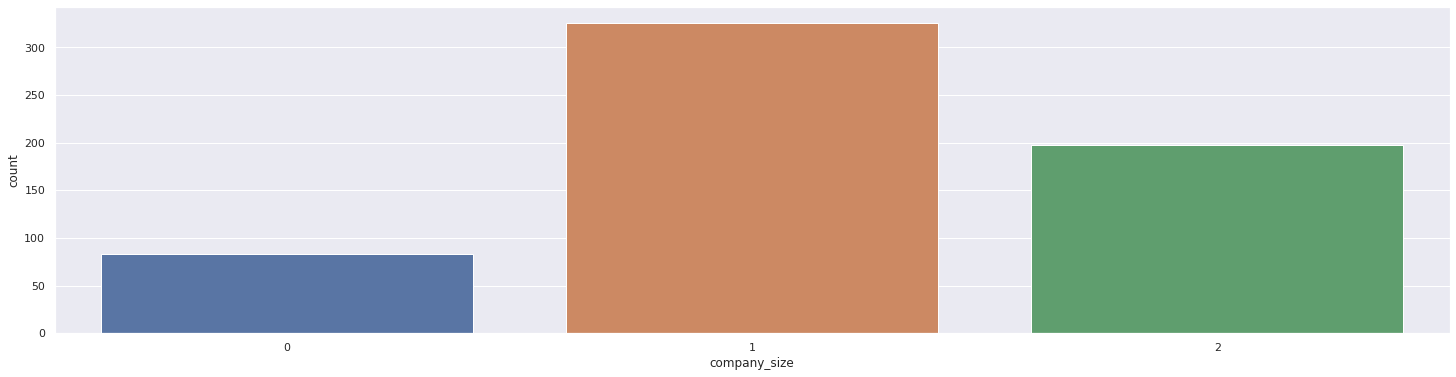

In [ ]:
sns.set(rc={'figure.figsize':(25,6)})
sns.countplot(c_size)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


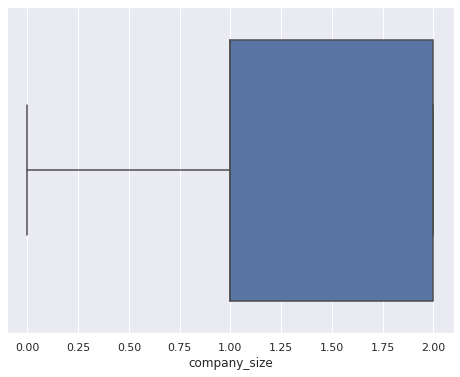

In [ ]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(c_size)

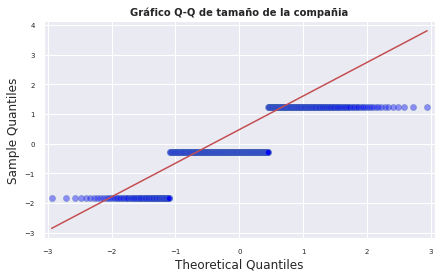

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    c_size,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de tamaño de la compañia', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

# **Job title**

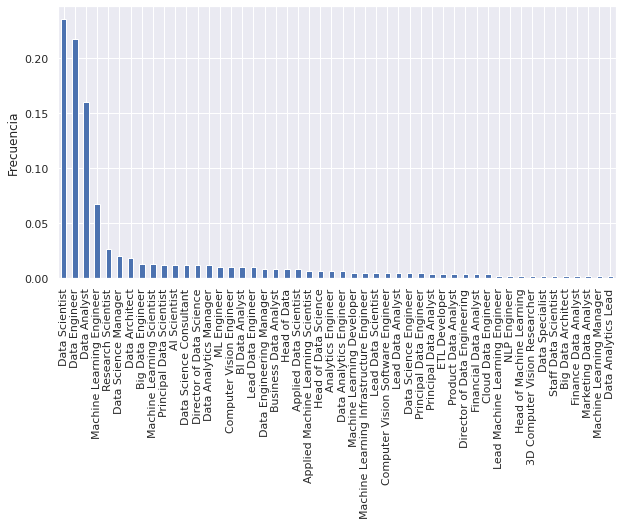

In [ ]:
j_title = df.job_title
plt.figure(figsize = (10,5))
ax =  j_title.value_counts('job_title').plot(kind ='bar')
ax.set_ylabel('Frecuencia')
plt.show()

# **Employee residence**

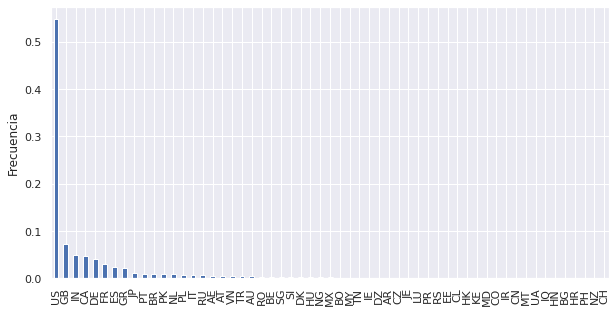

In [ ]:
e_residence = df.employee_residence	
plt.figure(figsize = (10,5))
ax =  e_residence.value_counts('employee_residence').plot(kind ='bar')
ax.set_ylabel('Frecuencia')
plt.show()

# **Company location**

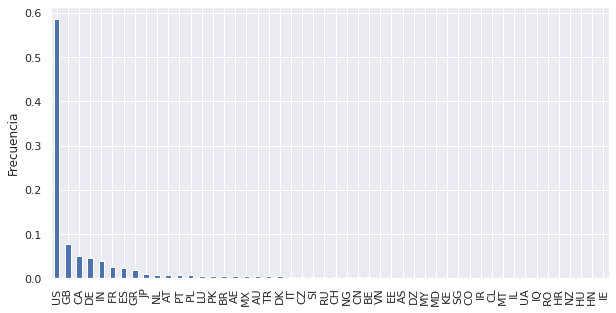

In [ ]:
c_location = df.company_location
plt.figure(figsize = (10,5))
ax =  c_location.value_counts('company_location').plot(kind ='bar')
ax.set_ylabel('Frecuencia')
plt.show()

# **EXTRA**

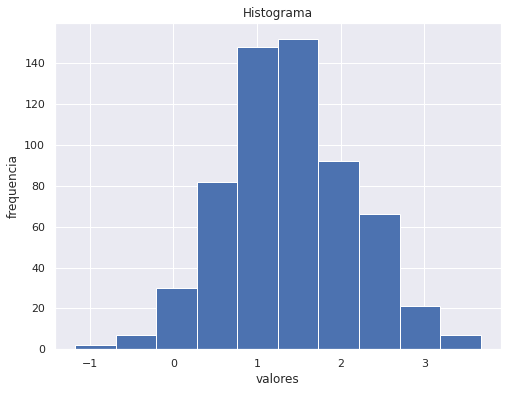

In [ ]:
media = experience.mean()
DE = experience.std()
datos = np.random.normal(media, DE, len(experience)) #creando muestra de datos
plt.hist(datos)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

# **Sección nueva**

In [ ]:
from scipy import stats

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 0.2567400911732919


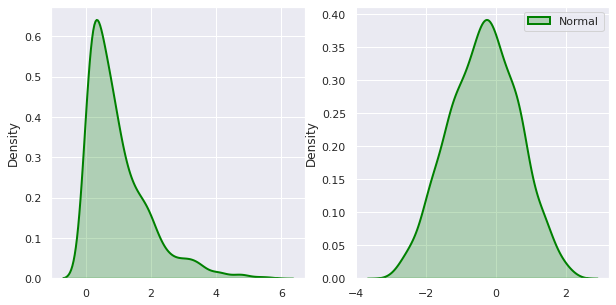

In [ ]:
# generate non-normal data (exponential)
original_data = np.random.exponential(size = 1000)

# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

# **Sección nueva**

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2020,1,3,Data Scientist,79833,DE,0,DE,2
1,2020,2,3,Machine Learning Scientist,260000,JP,0,JP,0
2,2020,2,3,Big Data Engineer,109024,GB,50,GB,1
3,2020,1,3,Product Data Analyst,20000,HN,0,HN,0
4,2020,2,3,Machine Learning Engineer,150000,US,50,US,2
...,...,...,...,...,...,...,...,...,...
602,2022,2,3,Data Engineer,154000,US,100,US,1
603,2022,2,3,Data Engineer,126000,US,100,US,1
604,2022,2,3,Data Analyst,129000,US,0,US,1
605,2022,2,3,Data Analyst,150000,US,100,US,1
